In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
model = tf.keras.models.load_model("models/cifar10_model_2.h")

In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)        

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
n_classes = 10
#Converts a class vector to binary class matrix
#y:class vector to be converted into a matrix(from 0 to num_classes)
#num_classes:total number of classes
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [6]:
#convert data from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
#normalise data
X_train = X_train/255
X_test = X_test/255
X_train.shape

(50000, 32, 32, 3)

In [8]:
#history = model.fit(X_train, y_train, epochs=150, validation_split = 0.1)

In [9]:
#Testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test_acc:", test_acc)

313/313 [==============================] - 5s 3ms/step - loss: 0.5839 - acc: 0.8047
Test_acc: 0.8047000169754028


In [10]:
import sys
!{sys.executable} -m pip install pandas
import pandas as pd
history = pd.read_csv('models/cifar10_history_2.csv')

In [11]:
history.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

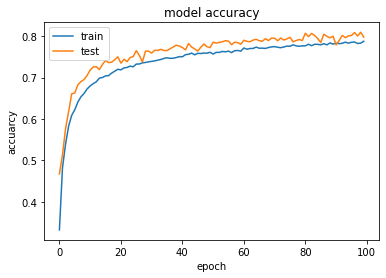

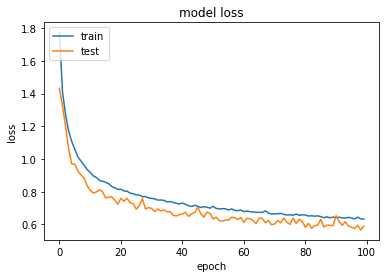

In [12]:
import matplotlib.pyplot as plt
#summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

#summarize history for accuracy
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()